<a href="https://colab.research.google.com/github/Monishsoni296/covid/blob/main/COVID_19_Data_Visualisation_and_Timeseries_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium 
from folium import plugins
plt.rcParams['figure.figsize'] = 10, 12
import warnings
warnings.filterwarnings('ignore')

# **Current situation of pandemic in India**

In [ ]:
df= pd.read_excel('/content/drive/MyDrive/group33_minor/covid-19 statewise status.xlsx')
df.head()

Name of State / UT  TOTAL CASES  ACTIVE  DISCHARGED  DEATHS  ACTIVE RATIO  \
0        Maharashtra      7873369     893     7724697  147779        0.0100   
1             Kerala      6530646    4881     6457993   67772        0.0700   
2          Karnataka      3945247    1818     3903380   40049        0.0500   
3         Tamil Nadu      3452647     418     3414204   38025        0.0001   
4     Andhra Pradesh      2319448     395     2304323   14730        0.0002   

   DISCHARGE RATIO  DEATH RATIO  
0           0.9811       0.0188  
1           0.9889       0.0104  
2           0.9894       0.0102  
3           0.9889       0.0110  
4           0.9935       0.0064

In [ ]:
total_cases=df['TOTAL CASES'].sum()
print('The total number of cases till now in India is',total_cases)

The total number of cases till now in India is 45042693


# TOTAL CASES IN INDIA



In [ ]:
df.style.background_gradient(cmap='Reds')

# VISUALISING THE SPREADS GEOGRAPHICALLY

In [ ]:
India_coord = pd.read_excel('/content/drive/MyDrive/group33_minor/Indiancoordinates.xlsx')
df_full = pd.merge(India_coord,df,on = 'Name of State / UT')
map = folium.Map(location=[20, 70], zoom_start=5)


for lat, lon, value, name in zip(df_full['Latitude'], df_full['Longitude'], df_full['ACTIVE'], df_full['Name of State / UT']):
    folium.CircleMarker([lat, lon], radius=value*0.05, popup = ('<strong>State</strong>: ' + str(name).capitalize() + '<br>''<strong>Total Cases</strong>: ' + str(value) + '<br>'),color='red',fill_color='red',fill_opacity=0.3 ).add_to(map)
map

## **How Corona Virus is Rising along with vaccination**

In [ ]:
import plotly
plotly.io.renderers.default = 'colab'

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/group33_minor/WHO-COVID-19-global-data.csv', parse_dates=True)
df.drop(['Country_code','WHO_region','Cumulative_cases','Cumulative_deaths'], axis=1, inplace=True)
df = df.rename({'Date_reported' : 'date'}, axis=1)
df['date'] = pd.to_datetime(df['date'])

df['date'] = df['date'].dt.strftime('%d-%m-%Y')
df['month'] = pd.DatetimeIndex(df['date']).month
df['year'] = pd.DatetimeIndex(df['date']).year
df['date'] = pd.DatetimeIndex(df['date']).date

df['date'] = pd.to_datetime(df['date'])

df = df.dropna()
df.head()

date      Country  New_cases  New_deaths  month  year
0 2020-01-03  Afghanistan          0           0      1  2020
1 2020-01-04  Afghanistan          0           0      1  2020
2 2020-01-05  Afghanistan          0           0      1  2020
3 2020-01-06  Afghanistan          0           0      1  2020
4 2020-01-07  Afghanistan          0           0      1  2020

In [ ]:
df.drop(['month','year'], axis=1, inplace = True)
dbd_India = df.loc[df['Country'] == 'India']
dbd_India.tail()

date Country  New_cases  New_deaths
83609 2022-05-09   India       3207          29
83610 2022-05-10   India       2288          10
83611 2022-05-11   India       2897          54
83612 2022-05-12   India       2827          24
83613 2022-05-13   India       2841           9

# **Before Vaccination Drive**

In [ ]:
dbd_India = df.loc[df['Country'] == 'India']

dbd_India = dbd_India[dbd_India['date'] < '2021-01-15']
fig = go.Figure()
fig.add_trace(go.Scatter(x=dbd_India['date'], y = dbd_India['New_cases'], mode='markers',name='New Cases', line=dict(color='blue', width=2)))
fig.update_layout(title_text='Trend of New Coronavirus Cases in India',plot_bgcolor='rgb(230, 230, 230)')
fig.show()

fig2 = go.Figure()
fig2.add_trace(go.Scatter(x=dbd_India['date'], y = dbd_India['New_deaths'], mode='markers',name='New Deaths', line=dict(color='red', width=2)))
fig2.update_layout(title_text='Trend of Coronavirus Death Cases in India',plot_bgcolor='rgb(230, 230, 230)')
fig2.show()

In [ ]:
dv=pd.read_csv("/content/drive/MyDrive/group33_minor/country_vaccinations.csv")
dv_India = dv[dv["iso_code"] == 'IND'].copy()
dv_India.head()

country iso_code        date  total_vaccinations  people_vaccinated  \
35372   India      IND  2021-01-15                 0.0                0.0   
35373   India      IND  2021-01-16            191181.0           191181.0   
35374   India      IND  2021-01-17            224301.0           224301.0   
35375   India      IND  2021-01-18            454049.0           454049.0   
35376   India      IND  2021-01-19            674835.0           674835.0   

       people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
35372                      NaN                     NaN                 NaN   
35373                      NaN                191181.0            191181.0   
35374                      NaN                 33120.0            112150.0   
35375                      NaN                229748.0            151350.0   
35376                      NaN                220786.0            168709.0   

       total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
35372                            0.00                           0.00   
35373                            0.01                           0.01   
35374                            0.02                           0.02   
35375                            0.03                           0.03   
35376                            0.05                           0.05   

       people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  \
35372                                  NaN                             NaN   
35373                                  NaN                           137.0   
35374                                  NaN                            80.0   
35375                                  NaN                           109.0   
35376                                  NaN                           121.0   

                                     vaccines          source_name  \
35372  Covaxin, Oxford/AstraZeneca, Sputnik V  Government of India   
35373  Covaxin, Oxford/AstraZeneca, Sputnik V  Government of India   
35374  Covaxin, Oxford/AstraZeneca, Sputnik V  Government of India   
35375  Covaxin, Oxford/AstraZeneca, Sputnik V  Government of India   
35376  Covaxin, Oxford/AstraZeneca, Sputnik V  Government of India   

                        source_website  
35372  https://dashboard.cowin.gov.in/  
35373  https://dashboard.cowin.gov.in/  
35374  https://dashboard.cowin.gov.in/  
35375  https://dashboard.cowin.gov.in/  
35376  https://dashboard.cowin.gov.in/

# **After beginning of World Largest Vaccination Drive, (15th January, 2021 -  13th May, 2022)**

In [ ]:
dbd_India = df.loc[df['Country'] == 'India']

dbd_India = dbd_India[dbd_India['date'] >= '2021-01-15']
fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=dbd_India['date'], y = dbd_India['New_cases'], mode='markers',name='New Cases', line=dict(color='blue', width=2)))
fig1.update_layout(title_text='Trend of New Coronavirus Cases in India',plot_bgcolor='rgb(230, 230, 230)')
fig1.show()

fig2 = go.Figure()
fig2.add_trace(go.Scatter(x=dbd_India['date'], y = dbd_India['New_deaths'], mode='markers',name='New Deaths', line=dict(color='red', width=2)))
fig2.update_layout(title_text='Trend of Coronavirus Death Cases in India',plot_bgcolor='rgb(230, 230, 230)')
fig2.show()

fig3 = go.Figure()
fig3.add_trace(go.Scatter(x=dv_India['date'], y = dv_India['daily_vaccinations'], mode='markers',name='Vaccine', line=dict(color='green', width=2)))
fig3.update_layout(title_text='Daily Vaccination in India',plot_bgcolor='rgb(230, 230, 230)')
fig3.show()

# **Similar Analysis between India, USA and Russia**

# **Before Vaccination Drive**

In [ ]:
dbd_India = df.loc[df['Country'] == 'India']
dbd_USA = df.loc[df['Country'] == 'United States of America']
dbd_russia = df.loc[df['Country'] == 'Russian Federation']

dbd_India = dbd_India[dbd_India['date'] < '2020-12-14']
dbd_USA = dbd_USA[dbd_USA['date'] < '2020-12-14']
dbd_russia = dbd_russia[dbd_russia['date'] < '2020-12-14']

fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=dbd_India['date'], y = dbd_India['New_cases'], mode='markers',name='India'))
fig1.add_trace(go.Scatter(x=dbd_USA['date'], y = dbd_USA['New_cases'], mode='markers',name='USA'))
fig1.add_trace(go.Scatter(x=dbd_russia['date'], y = dbd_russia['New_cases'], mode='markers',name='Russia'))
fig1.update_layout(title_text='Trend of Coronavirus Cases in India/ USA/ Russia',plot_bgcolor='rgb(230, 230, 230)')
fig1.show()

fig2 = go.Figure()
fig2.add_trace(go.Scatter(x=dbd_India['date'], y = dbd_India['New_deaths'], mode='markers',name='India'))
fig2.add_trace(go.Scatter(x=dbd_USA['date'], y = dbd_USA['New_deaths'], mode='markers',name='USA'))
fig2.add_trace(go.Scatter(x=dbd_russia['date'], y = dbd_russia['New_deaths'], mode='markers',name='Russia'))
fig2.update_layout(title_text='Trend of Coronavirus Death Cases in India',plot_bgcolor='rgb(230, 230, 230)')
fig2.show()

# **After beginning of Vaccination Drive, (14th Decemmber, 2020 -  13th May, 2022)**

In [ ]:
dbd_India = df.loc[df['Country'] == 'India']
dbd_USA = df.loc[df['Country'] == 'United States of America']
dbd_russia = df.loc[df['Country'] == 'Russian Federation']

dv_India = dv[dv["iso_code"] == 'IND'].copy()
dv_USA = dv[dv["iso_code"] == 'USA'].copy()
dv_russia = dv[dv["iso_code"] == 'RUS'].copy()

dbd_India = dbd_India[dbd_India['date'] >= '2020-12-14']
dbd_USA = dbd_USA[dbd_USA['date'] >= '2020-12-14']
dbd_russia = dbd_russia[dbd_russia['date'] >= '2020-12-14']

fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=dbd_India['date'], y = dbd_India['New_cases'], mode='markers',name='India'))
fig1.add_trace(go.Scatter(x=dbd_USA['date'], y = dbd_USA['New_cases'], mode='markers',name='USA'))
fig1.add_trace(go.Scatter(x=dbd_russia['date'], y = dbd_russia['New_cases'], mode='markers',name='Russia'))
fig1.update_layout(title_text='Trend of Coronavirus Cases in India/ USA/ Russia',plot_bgcolor='rgb(230, 230, 230)')
fig1.show()

fig2 = go.Figure()
fig2.add_trace(go.Scatter(x=dbd_India['date'], y = dbd_India['New_deaths'], mode='markers',name='India'))
fig2.add_trace(go.Scatter(x=dbd_USA['date'], y = dbd_USA['New_deaths'], mode='markers',name='USA'))
fig2.add_trace(go.Scatter(x=dbd_russia['date'], y = dbd_russia['New_deaths'], mode='markers',name='Russia'))
fig2.update_layout(title_text='Trend of Coronavirus Death Cases in India/ USA/ Russia',plot_bgcolor='rgb(230, 230, 230)')
fig2.show()

fig3 = go.Figure()
fig3.add_trace(go.Scatter(x=dv_India['date'], y = dv_India['daily_vaccinations'], mode='markers',name='India'))
fig3.add_trace(go.Scatter(x=dv_USA['date'], y = dv_USA['daily_vaccinations'], mode='markers',name='USA'))
fig3.add_trace(go.Scatter(x=dv_russia['date'], y = dv_russia['daily_vaccinations'], mode='markers',name='Russia'))
fig3.update_layout(title_text='Daily vaccination in India/ USA, Russia',plot_bgcolor='rgb(230, 230, 230)')
fig3.show()

## **Worldwide Coronavirus confirmed and death cases**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/group33_minor/WHO-COVID-19-global-data.csv', parse_dates=True)
df.drop(['Country_code','WHO_region','Cumulative_cases','Cumulative_deaths'], axis=1, inplace=True)
df = df.rename({'Date_reported' : 'date'}, axis=1)
df['date'] = pd.to_datetime(df['date'])

df['date'] = df['date'].dt.strftime('%d-%m-%Y')
df['month'] = pd.DatetimeIndex(df['date']).month
df['year'] = pd.DatetimeIndex(df['date']).year
df['date'] = pd.DatetimeIndex(df['date']).date

df['date'] = pd.to_datetime(df['date'])

df = df.dropna()
df.drop(['month','year'], axis=1, inplace = True)
df.tail()

date   Country  New_cases  New_deaths
204289 2022-05-09  Zimbabwe          0           0
204290 2022-05-10  Zimbabwe          0           0
204291 2022-05-11  Zimbabwe          0           0
204292 2022-05-12  Zimbabwe          0           0
204293 2022-05-13  Zimbabwe          0           0

In [ ]:
df.groupby('date').sum().head()

New_cases  New_deaths
date                             
2020-01-03          0           0
2020-01-04          3           0
2020-01-05          0           0
2020-01-06          3           0
2020-01-07          0           0

In [ ]:
confirmed = df.groupby('date').sum()['New_cases'].reset_index()
deaths = df.groupby('date').sum()['New_deaths'].reset_index()

In [ ]:
fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=confirmed['date'], y=confirmed['New_cases'], mode='markers', name='Confirmed',line=dict(color='blue', width=2)))
fig1.update_layout(title='Worldwide COVID-19 Confirmed Cases', xaxis_tickfont_size=14,yaxis=dict(title='Number of Cases'))
fig1.show()

fig2 = go.Figure()
fig2.add_trace(go.Scatter(x=deaths['date'], y=deaths['New_deaths'], mode='markers', name='Deaths', line=dict(color='Red', width=2)))
fig2.update_layout(title='Worldwide NCOVID-19 Death Cases', xaxis_tickfont_size=14,yaxis=dict(title='Number of Cases'))
fig2.show()

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/group33_minor/covid_19_data.csv',parse_dates=['Last Update'])
df1.rename(columns={'ObservationDate':'Date', 'Country/Region':'Country'}, inplace=True)
df_confirmed = pd.read_csv("/content/drive/MyDrive/group33_minor/time_series_covid_19_confirmed.csv")
df_confirmed.rename(columns={'Country/Region':'Country'}, inplace=True)

In [ ]:
df_confirmed = df_confirmed[["Province/State","Lat","Long","Country"]]
df_temp = df1.copy()
df_temp['Country'].replace({'Mainland China': 'China'}, inplace=True)
df_latlong = pd.merge(df_temp, df_confirmed, on=["Country", "Province/State"])

In [ ]:
fig = px.density_mapbox(df_latlong, lat="Lat", lon="Long", hover_name="Province/State", hover_data=["Confirmed","Deaths","Recovered"], animation_frame="Date", color_continuous_scale="Portland", radius=7, zoom=0,height=700)
fig.update_layout(title='Worldwide Corona Virus Cases Time Lapse - Confirmed, Deaths, Recovered')
fig.update_layout(mapbox_style="open-street-map", mapbox_center_lon=0)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

## **Worldwide vaccination drive**

In [ ]:
fig = px.choropleth(dv.reset_index(), locations="iso_code",
                    color="total_vaccinations_per_hundred",
                    color_continuous_scale=px.colors.sequential.Electric,
                   title= "Total vaccinations per 100")

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

# **TIME SERIES ANALYSIS**

# **Prediction model for confirmed cases in India using FB Prophet**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
from prophet.plot import plot_plotly, plot_components_plotly
from prophet import Prophet

In [ ]:
df_india = df.loc[df['Country'] == 'India']
df_india.drop(['Country','New_deaths'], axis=1, inplace = True)
df_india.columns = ['ds','y']

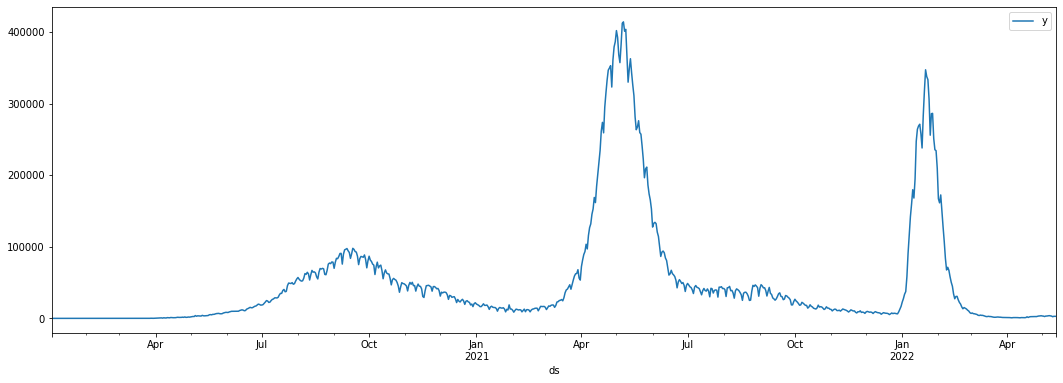

In [ ]:
df_india.plot(x='ds', y='y', figsize=(18,6))

In [ ]:
len(df_india)

862

Splitting dataset for training and testing

In [ ]:
train = df_india.iloc[:len(df_india)-365]
test = df_india.iloc[len(df_india)-365:]

Making Predictions

In [ ]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods = 7)
forecast = m.predict(future)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzihd5ryv/rlhg00_h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzihd5ryv/ygj45xyf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56889', 'data', 'file=/tmp/tmpzihd5ryv/rlhg00_h.json', 'init=/tmp/tmpzihd5ryv/ygj45xyf.json', 'output', 'file=/tmp/tmpzihd5ryv/prophet_model2vxnfe8c/prophet_model-20221103133434.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:34:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:34:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
forecast.tail()

ds          trend     yhat_lower     yhat_upper    trend_lower  \
499 2021-05-16  311320.324699  268758.724170  358647.469984  311320.324699   
500 2021-05-17  314518.323013  270945.989603  357114.995326  314518.323013   
501 2021-05-18  317716.321327  268112.520022  357395.148081  317716.321327   
502 2021-05-19  320914.319641  272749.092317  363288.602005  320859.808867   
503 2021-05-20  324112.317955  281449.640758  371872.129992  323984.970926   

       trend_upper  additive_terms  additive_terms_lower  \
499  311320.324699     1667.043006           1667.043006   
500  314525.678068     -285.356465           -285.356465   
501  317791.313867    -5458.762600          -5458.762600   
502  321080.557172    -1079.774929          -1079.774929   
503  324409.444223     1998.687803           1998.687803   

     additive_terms_upper       weekly  weekly_lower  weekly_upper  \
499           1667.043006  1667.043006   1667.043006   1667.043006   
500           -285.356465  -285.356465   -285.356465   -285.356465   
501          -5458.762600 -5458.762600  -5458.762600  -5458.762600   
502          -1079.774929 -1079.774929  -1079.774929  -1079.774929   
503           1998.687803  1998.687803   1998.687803   1998.687803   

     multiplicative_terms  multiplicative_terms_lower  \
499                   0.0                         0.0   
500                   0.0                         0.0   
501                   0.0                         0.0   
502                   0.0                         0.0   
503                   0.0                         0.0   

     multiplicative_terms_upper           yhat  
499                         0.0  312987.367705  
500                         0.0  314232.966548  
501                         0.0  312257.558728  
502                         0.0  319834.544713  
503                         0.0  326111.005758

In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds           yhat     yhat_lower     yhat_upper
499 2021-05-16  312987.367705  268758.724170  358647.469984
500 2021-05-17  314232.966548  270945.989603  357114.995326
501 2021-05-18  312257.558728  268112.520022  357395.148081
502 2021-05-19  319834.544713  272749.092317  363288.602005
503 2021-05-20  326111.005758  281449.640758  371872.129992

In [ ]:
test.tail()

ds     y
83609 2022-05-09  3207
83610 2022-05-10  2288
83611 2022-05-11  2897
83612 2022-05-12  2827
83613 2022-05-13  2841

FB Prophet Visualization

In [ ]:
plot_plotly(m, forecast)

In [ ]:
plot_components_plotly(m, forecast)

Evaluating model

In [ ]:
from statsmodels.tools.eval_measures import rmse

In [ ]:
predictions = forecast.iloc[-365:]['yhat']

In [ ]:
print("Root Mean Squared Error between actual and predicted values: ", rmse(predictions, test['y']))
print("Mean Value of Test Dataset: ", test['y'].mean())

Root Mean Squared Error between actual and predicted values:  134395.5687466503
Mean Value of Test Dataset:  53185.17534246575


# **Prediction model for confirmed cases in India using ARIMA model**

In [ ]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import pacf, pacf
from statsmodels.tsa.arima_model import ARIMA

ImportError: ignored

In [ ]:
df_india = df.loc[df['Country'] == 'India']
df_india.set_index("date", inplace = True)

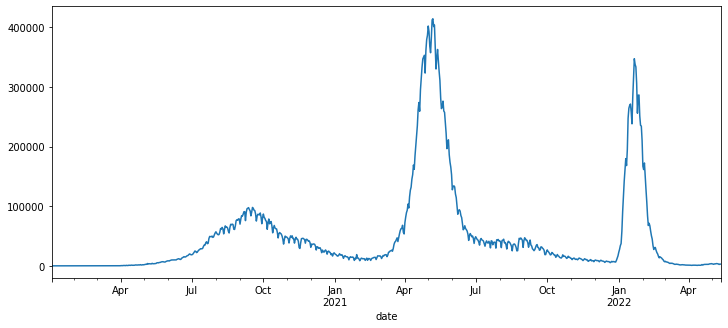

In [ ]:
df_india['New_cases'].plot(figsize=(12,5))

Check for Stationary

In [ ]:
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ",dftest[1])
  print("3. Num of Lags : ",dftest[2])
  print("4. Num of observ : ", dftest[3])
  print("5. Critical values : ")
  for key, val in dftest[4].items():
    print("\t", key, ": ",val)

ImportError: ignored

In [ ]:
ad_test(df_india['New_cases'])

Figure out order for ARIMA Model

# Making model stationary

Method 1 - Differencing

In [ ]:
df_india['New_cases'].plot(figsize=(12,5))

In [ ]:
df1 = df_india.copy()
df1['New_cases'] = df1['New_cases']-df1['New_cases'].shift(1)
df1 = df1.dropna()
df1['New_cases'].plot(figsize=(12,5))

Checking stationarity

In [ ]:
ad_test(df1['New_cases'])

Method 2 - Seasonal Differencing

In [ ]:
df2 = df_india.copy()
df2['New_cases'] = df2['New_cases']-df2['New_cases'].shift(7)
df2 = df2.dropna()
df2['New_cases'].plot(figsize=(12,5))

Checking stationarity

In [ ]:
ad_test(df2['New_cases'])

Method 3 - Transformation

In [ ]:
df3 = df_india.copy()
# square root calculation
df3['adj_sqrt'] = np.sqrt(df3['New_cases'])

In [ ]:
df3['adj_sqrt'].dropna()
df3['adj_sqrt'].plot(figsize=(12,5))

Checking stationarity

In [ ]:
df3 = df3.dropna()
ad_test(df3['adj_sqrt'])

In [ ]:
df3['adj_sqrt_diff'] = df3['adj_sqrt']-df3['adj_sqrt'].shift(1)
df3['adj_sqrt_diff'].dropna()
df3['adj_sqrt_diff'].plot(figsize=(12,5))

Checking stationarity

In [ ]:
df3 = df3.dropna()
ad_test(df3['adj_sqrt_diff'])

Method 4 - Rolling statistics

In [ ]:
df4 = df_india.copy()
df4['ma20'] = df4['New_cases'].rolling(window = 20).mean()
df4['ma20'].dropna()
df4['ma20'].plot(figsize=(12,5))

Checking stationarity

In [ ]:
df4 = df4.dropna()
ad_test(df4['ma20'])

# Result : Method 1 - Differencing results in min P-value : 6.609948963088197e-10

In [ ]:
df_india = df1
df_india.plot(figsize=(12,5))

Plotting Partial Auto Coorelation to determine order of Auto Regression

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
pacf = plot_pacf(df_india['New_cases'], lags=25)
acf = plot_acf(df_india['New_cases'], lags=25)

Figure out order for ARIMA Model

In [ ]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

determining minimum AIC score

In [ ]:
stepwise_fit = auto_arima(df_india['New_cases'],  trace=True, suppress_warnings=True)
stepwise_fit.summary()

Split Data into Trainig and Testing

In [ ]:
print(df_india.shape)
train = df_india.iloc[:-30]
test = df_india.iloc[-30:]
print(train.shape, test.shape)

Training the Model

In [ ]:
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(train['New_cases'], order=(5,0,5))
model = model.fit()
model.summary()

Make Predictions on Test Set

In [ ]:
start = len(train)
end = len(train)+len(test)-1
pred = model.predict(start = start, end = end, type = 'levels')
print(pred)

In [ ]:
pred.plot(legend = True)
test['New_cases'].plot(legend = True)

In [ ]:
test['New_cases'].mean()

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(pred, test['New_cases']))
print(rmse)

In [ ]:
model2 = sm.tsa.arima.ARIMA(df_india['New_cases'], order=(5,0,5))
model2 = model2.fit()
df_india.tail()

For Future Dates

In [ ]:
index_future_dates = pd.date_range(start = '2022-05-13', end = '2022-05-20')
pred = model2.predict(start = len(df_india), end = len(df_india)+7, type = 'levels').rename('ARIMA Predictions')
pred.index = index_future_dates
print(pred)

In [ ]:
pred.plot(figsize = (12,5), legend = True)